In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('./train.csv')
X = data
y = X.pop('SalePrice')

In [4]:
numeric_col = X.select_dtypes(exclude = 'object').columns
categorical_col = X.select_dtypes(include = 'object').columns

***MUTUAL INFORMATION - MI*** : thông tin tương hỗ  
Là đặc trưng cho sự tương quan giữa 2 biến mà trong đó, thông tin của biến này có thể củng cố cho biến còn lại, tức làm giảm tính bất định của biến.  
Nói cách khác : là **"Thông tin biến X nằm trong biến Y"**

Trước khi dùng MI, cần process categorical type trước bằng pd.factorize() hoặc OrdinalEncoder()  

**Dữ liệu rời rạt và liên tục** :  

Trong MI cần phân biệt rõ giữa **Giá trị RR(thường là float)** và **Giá trị LT(categorical types encoded to int và int)**  

Trong đó, sau khi xử lý Categorical Type (factorize), ta cần tạo mảng phân loại RR và LT vì MI sẽ xử lý khác nhau

In [5]:
def fill_na(X):
    X_filled = X.copy()
    for col in X_filled.columns:
        if X_filled[col].dtype == "object":
            # Với dữ liệu dạng category/string → thay NaN bằng "missing"
            X_filled[col] = X_filled[col].fillna("missing")
        else:
            # Với dữ liệu số → thay NaN bằng median
            X_filled[col] = X_filled[col].fillna(X_filled[col].median())
    return X_filled


In [6]:
X = fill_na(X)

In [7]:
for col in categorical_col :
    X[col],_ = X[col].factorize()

In [15]:
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X,y,discrete_features='auto')
mi_scores = pd.Series(mi, index = X.columns, name = "MI scores")

Text(0.5, 1.0, 'Mutual Information Scores')

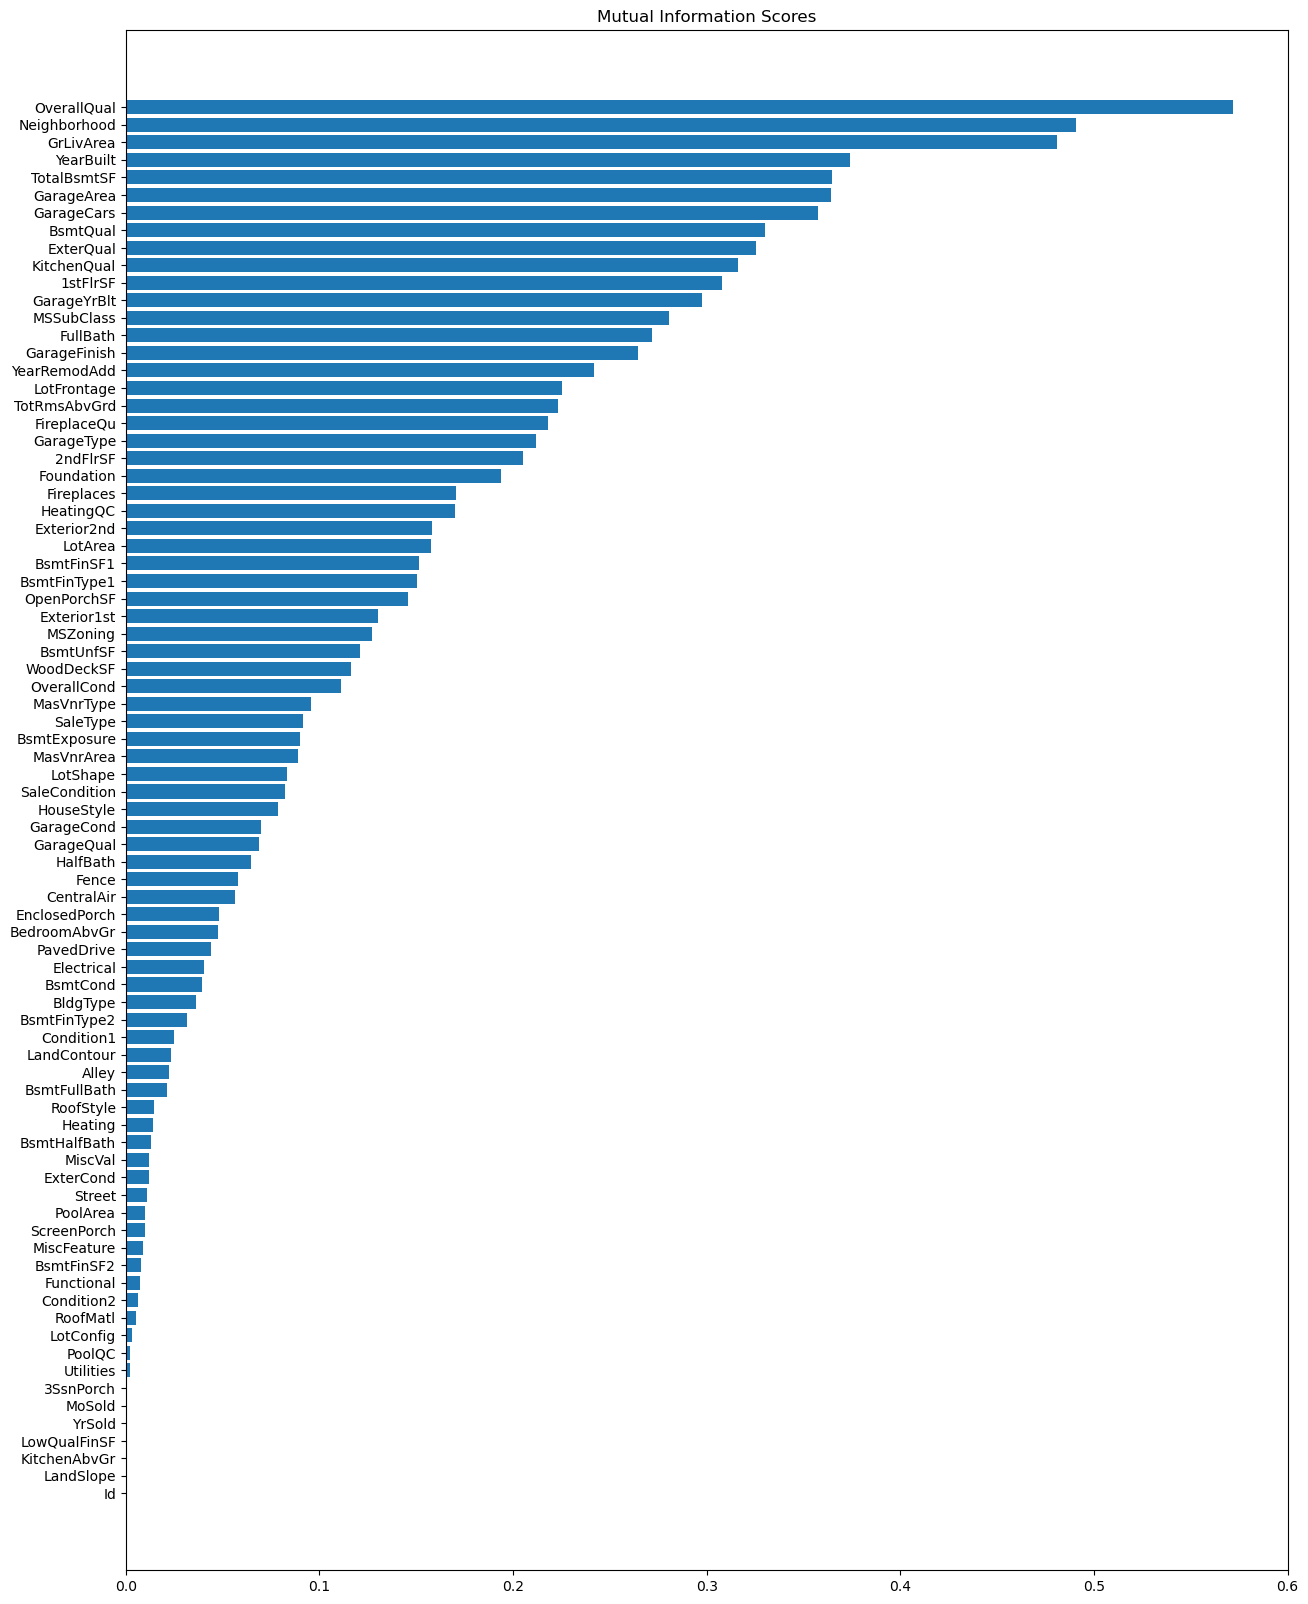

In [ ]:
import matplotlib.pyplot as plt
plt.figure(dpi = 100, figsize=(15,20))
scores = mi_scores.sort_values(ascending=True)
width = np.arange(len(scores))
ticks = list(scores.index)
plt.barh(width, scores)
plt.yticks(width, ticks)
plt.title("Mutual Information Scores")

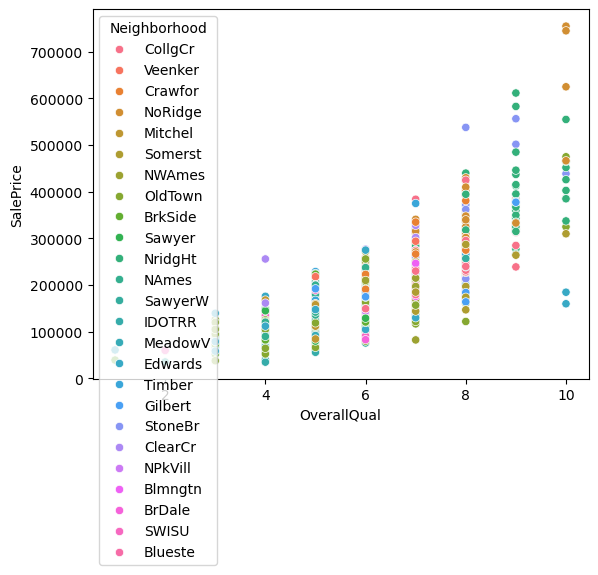

In [ ]:
import seaborn as sns
sns.scatterplot(x = data['OverallQual'], y = y, hue = data['Neighborhood'])
plt.show()
pd.ap